# PQ& Vs, PQ+ - Objects Table 1

Thsi notebook contains the code to recreate the Table 1 in the paper, where we check that the reported overlaps are correct, and then convert the objects to latex code for rendering in the paper for the cat as this is a more complex picture than the first two examples.

In [110]:
import cv2
import shapely
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely import Polygon, unary_union, intersection

For the first raw of the table we will make two rectangular objects of the same size that are only shifted along the x-axis. We use the `shapely` package for drawing these shapes, as it is the easiest to work with for drawing the shapes.

In [111]:
# Two polygons of 0.5 by 2 (so with an area of 1), with an iou of exactly 0.5
rect_1 = Polygon([(0, 0), (0, 0.5), (2, 0.5), (2, 0), (0, 0)])
rect_2 = Polygon([(1, 0), (1, 0.5), (3, 0.5), (3, 0), (1, 0)])

# rects slightly shifted
rect_3 = Polygon([(0.05, 0), (0.05, 0.5), (2.05, 0.5), (2.05, 0), (0.05, 0)])
rect_4 = Polygon([(0.95, 0), (0.95, 0.5), (2.95, 0.5), (2.95, 0), (0.95, 0)])

# Now again shifted so that the IoU comes in at just more than 0.5
rect_5 = Polygon([(0, 0), (0, 0.5), (2, 0.5), (2, 0), (0, 0)])
rect_6 = Polygon([(2/3, 0), (2/3, 0.5), (2+2/3-0.01, 0.5), (2+2/3-0.01, 0), (2/3, 0)])

In [112]:
def plot_shapely_object(obj, color, ax):
    x, y = obj.exterior.coords.xy
    ax.plot(x, y, color=color)
    ax.fill_between(x, y, facecolor=color, alpha=0.3)
    

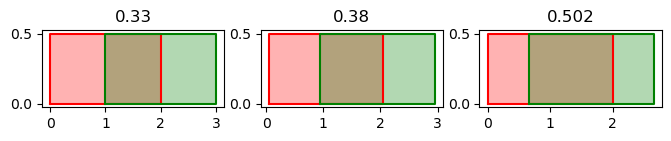

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 1))
# Plot the first image where the overlap is too little for both 
plot_shapely_object(rect_1, color='red', ax=axes[0])
plot_shapely_object(rect_2, color='green', ax=axes[0])
axes[0].set_title(round(intersection(rect_1, rect_2).area / unary_union([rect_1, rect_2]).area, 2))

# plot again with both objects slightly shifted
plot_shapely_object(rect_3, color='red', ax=axes[1])
plot_shapely_object(rect_4, color='green', ax=axes[1])
axes[1].set_title(round(intersection(rect_3, rect_4).area / unary_union([rect_3, rect_4]).area, 2))

# plot again with both objects slightly shifted
plot_shapely_object(rect_5, color='red', ax=axes[2])
plot_shapely_object(rect_6, color='green', ax=axes[2])
axes[2].set_title(round(intersection(rect_5, rect_6).area / unary_union([rect_5, rect_6]).area, 3))

plt.show()

We repeat the same process for the squares, and plot them again with their overlap.

In [114]:
square_1 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
square_2 = Polygon([(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])

square_3 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
square_4 = Polygon([(0.585, 0.585), (0.585, 2.585), (2.585, 2.585), (2.585, 0.585), (0.585, 0.585)])

square_5 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
square_6 = Polygon([(0.365, 0.365), (0.365, 2.365), (2.365, 2.365), (2.365, 0.365), (0.365, 0.365)])


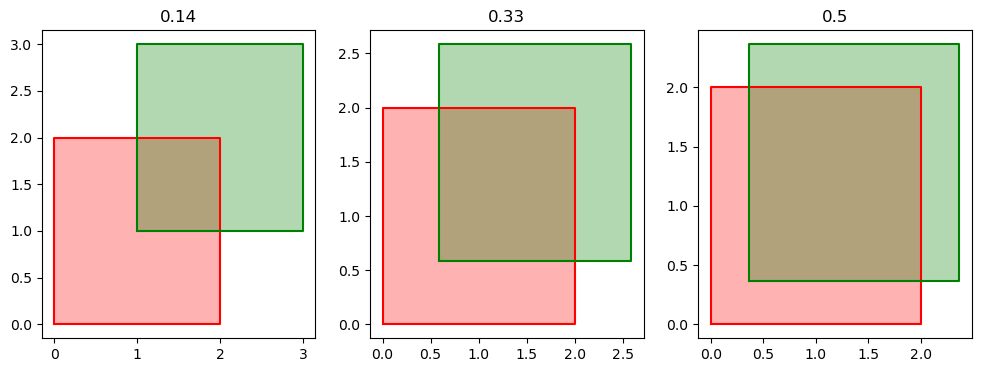

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the first image where the overlap is too little for both 
plot_shapely_object(square_1, color='red', ax=axes[0])
plot_shapely_object(square_2, color='green', ax=axes[0])
axes[0].set_title(round(intersection(square_1, square_2).area / unary_union([square_1, square_2]).area, 2))

plot_shapely_object(square_3, color='red', ax=axes[1])
plot_shapely_object(square_4, color='green', ax=axes[1])
axes[1].set_title(round(intersection(square_3, square_4).area / unary_union([square_3, square_4]).area, 2))

plot_shapely_object(square_5, color='red', ax=axes[2])
plot_shapely_object(square_6, color='green', ax=axes[2])
axes[2].set_title(round(intersection(square_5, square_6).area / unary_union([square_5, square_6]).area, 2))

plt.show()

For the final image we take a 'real' image of a cat as example of a contour, extract the contour, and shift it so that it has the amounts of overlap required for the various conditions as shown in Table 1 in the paper.

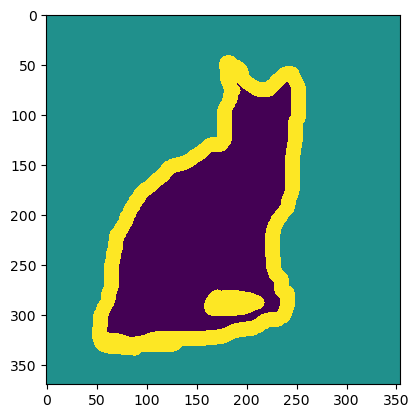

In [117]:
# Load the image
image_annotation = mpimg.imread('Egyptian_Mau_12.png')*255 # convert to the trimap representation
 
# show image
plt.imshow(image_annotation)

We take the contour of the cat (indicated by the 1 in the matrix) and move this around to get the different values.

In [118]:
def preprocess_mask(mask):
    mask[mask == 1] = 1
    mask[(mask == 2) | (mask == 3)] = 0
    return mask

In [119]:
# load the annotation
annotation = preprocess_mask(image_annotation)
# get contours of cat

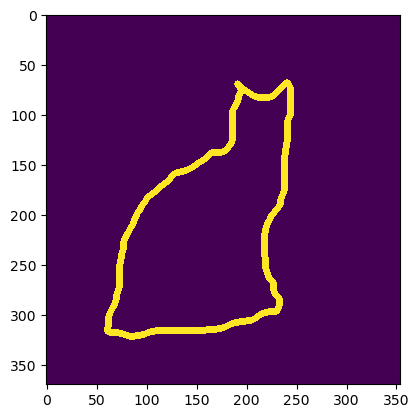

In [138]:
image = np.zeros_like(annotation)
cat_contours = cv2.findContours(annotation.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, [cat_contours[0][0]], -1, 255, thickness=5)
plt.imshow(image)

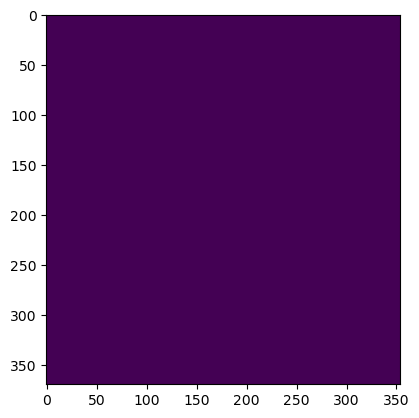

In [148]:
# Define our translation
cat_contours = cv2.findContours(annotation.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(np.zeros_like(annotation), [cat_contours[0][0]], -1, 255, thickness=5)
first_T = np.float32([
    [1, 0, -20],
    [0, 1, -150]])
shifted_1 = cv2.warpAffine(annotation, first_T, (annotation.shape[1], annotation.shape[0]))
shifted_1_contours = cv2.findContours(shifted_1.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
a = cv2.drawContours(np.zeros_like(annotation), [shifted_1_contours[0][0]], -1, (0, 0, 255), thickness=5)
plt.imshow(a)

# image2 = mpimg.imread('Egyptian_Mau_12.png')
# gt_contours = cv2.findContours(binary_gt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(image2, [gt_contours[0][0]], -1, (0,255, 0), thickness=5)
# second_T = np.float32([
#     [1, 0, -20],
#     [0, 1, -86]])
# shifted_2 = cv2.warpAffine(annotation, second_T, (annotation.shape[1], annotation.shape[0]))
# shifted_2 = cv2.cvtColor(shifted_2, cv2.COLOR_BGR2GRAY)
# shifted_2_contours = cv2.findContours(shifted_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# _ = cv2.drawContours(image2, [shifted_2_contours[0][0]], -1, (0, 0, 255), thickness=5)



# image3 = mpimg.imread('Egyptian_Mau_12.png')
# gt_contours = cv2.findContours(binary_gt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(image3, [gt_contours[0][0]], -1, (0, 255, 0), thickness=5)
# third_T = np.float32([
#     [1, 0, -20],
#     [0, 1, -58]])

# shifted_3 = cv2.warpAffine(annotation, third_T, (annotation.shape[1], annotation.shape[0]))
# shifted_3 = cv2.cvtColor(shifted_3, cv2.COLOR_BGR2GRAY)
# shifted_3_contours = cv2.findContours(shifted_3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# _ = cv2.drawContours(image3, [shifted_3_contours[0][0]], -1, (0, 0, 255), thickness=5)

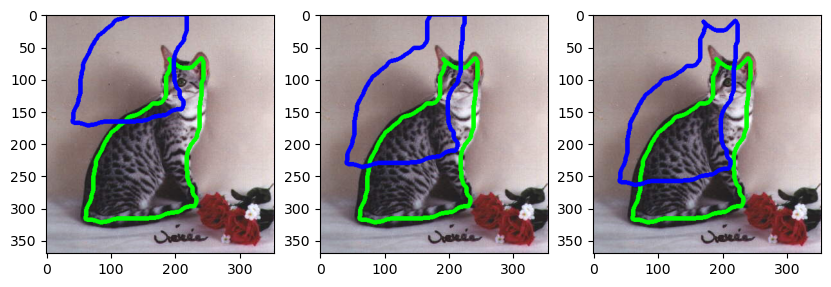

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes[0].imshow(image)
axes[1].imshow(image2)
axes[2].imshow(image3)

In [8]:
def approx(contour):
    epsilon = 0.005 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return approx

In [32]:
def create_binary_cat_image(original_image, x_shift=0, y_shift=0):
    binary_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    image_black = np.zeros_like(original_image)
    transformation = np.float32([
        [1, 0, x_shift],
        [0, 1, y_shift]])
    shifted = cv2.warpAffine(binary_image, transformation, (binary_image.shape[1], binary_image.shape[0]))
    contours = approx(cv2.findContours(shifted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0][0])
    print(contours)
    return {'contours': contours,
            'full': cv2.drawContours(image_black, [contours], -1, (255,255, 255), -1)}

In [33]:
# Now we define a function to get both PQ and PQ&
def PQ_calculation(gt_mask, pred_mask):
    
    intersection_area = np.logical_and(gt_mask, pred_mask).sum()
    only_gt = ((gt_mask - pred_mask) > 0).sum()
    only_pred = ((pred_mask - gt_mask) > 0).sum()
    union = ((pred_mask + gt_mask)>0).sum()
    IOU = intersection_area / union
    
    print(intersection_area/only_gt, intersection_area/only_pred, IOU)
    

In [34]:
# No overlap for both
gt = create_binary_cat_image(annotation, x_shift=0, y_shift=0)
shifted_1 = create_binary_cat_image(annotation, x_shift=-50, y_shift=-60)

# overlap only for PQ&
shifted_2 = create_binary_cat_image(annotation, x_shift=-30, y_shift=-45)

# Overlap for both PQ and and PQ+
shifted_3 = create_binary_cat_image(annotation, x_shift=-19, y_shift=-29)

PQ_calculation((gt['full']/255).astype(int), (shifted_3['full']/255).astype(int))


[[[241  68]]

 [[223  83]]

 [[208  82]]

 [[191  69]]

 [[195  76]]

 [[186  96]]

 [[182 133]]

 [[128 159]]

 [[100 184]]

 [[ 77 227]]

 [[ 73 273]]

 [[ 61 317]]

 [[ 88 322]]

 [[109 316]]

 [[170 315]]

 [[231 296]]

 [[233 284]]

 [[219 254]]

 [[218 219]]

 [[238 176]]]
[[[191   8]]

 [[173  23]]

 [[158  22]]

 [[141   9]]

 [[145  16]]

 [[136  36]]

 [[132  73]]

 [[ 78  99]]

 [[ 50 124]]

 [[ 27 167]]

 [[ 23 213]]

 [[ 11 257]]

 [[ 38 262]]

 [[ 59 256]]

 [[120 255]]

 [[181 236]]

 [[183 224]]

 [[169 194]]

 [[168 159]]

 [[188 116]]]
[[[211  23]]

 [[193  38]]

 [[178  37]]

 [[161  24]]

 [[165  31]]

 [[156  51]]

 [[152  88]]

 [[ 98 114]]

 [[ 70 139]]

 [[ 47 182]]

 [[ 43 228]]

 [[ 31 272]]

 [[ 58 277]]

 [[ 79 271]]

 [[140 270]]

 [[201 251]]

 [[203 239]]

 [[189 209]]

 [[188 174]]

 [[208 131]]]
[[[222  39]]

 [[204  54]]

 [[189  53]]

 [[172  40]]

 [[176  47]]

 [[167  67]]

 [[163 104]]

 [[109 130]]

 [[ 81 155]]

 [[ 58 198]]

 [[ 54 244]]

 [[ 42

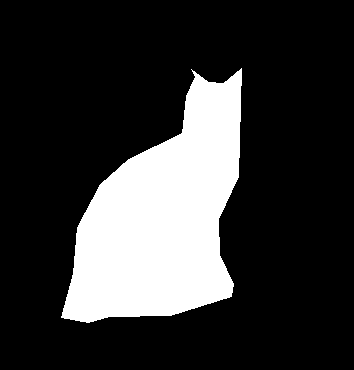

In [12]:
Image.fromarray(gt['full'])

In [13]:
gt_poly = shapely.Polygon(np.squeeze(gt['contours']).dot([[1,0],[0,-1]]))

shifted_1_poly = shapely.Polygon(np.squeeze(shifted_1['contours']).dot([[1,0],[0,-1]]))

shifted_2_poly = shapely.Polygon(np.squeeze(shifted_2['contours']).dot([[1,0],[0,-1]]))

shifted_3_poly = shapely.Polygon(np.squeeze(shifted_3['contours']).dot([[1,0],[0,-1]]))

In [14]:
def polygon_to_tikz(polygon):
    poly_coords = tuple(polygon.exterior.coords)
    nodes = "\draw " + " -- ".join([str(item) for item in poly_coords])
    print(nodes+';')
        

In [15]:
polygon_to_tikz(shifted_3_poly)

\draw (222.0, -39.0) -- (204.0, -54.0) -- (189.0, -53.0) -- (172.0, -40.0) -- (176.0, -47.0) -- (167.0, -67.0) -- (163.0, -104.0) -- (109.0, -130.0) -- (81.0, -155.0) -- (58.0, -198.0) -- (54.0, -244.0) -- (42.0, -288.0) -- (69.0, -293.0) -- (90.0, -287.0) -- (151.0, -286.0) -- (212.0, -267.0) -- (214.0, -255.0) -- (200.0, -225.0) -- (199.0, -190.0) -- (219.0, -147.0) -- (222.0, -39.0);


In [16]:
def get_cat(x_shift, y_shift):
    return Polygon([(0+x_shift, 0+y_shift),
                   (1+x_shift, 0+y_shift),
                   (2+x_shift, 1+y_shift),
                   (2+x_shift, 2+y_shift),
                   (2.5+x_shift,3+y_shift),
                   (1+x_shift, 2.5+y_shift),
                   (0+x_shift, 2.5+y_shift),
                   (-1.5+x_shift, 3+y_shift),
                   (-1+x_shift, 2+y_shift),
                   (-1+x_shift, 1+y_shift),
                   (0+x_shift, 0+y_shift)])

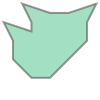

In [17]:
shapely.unary_union([get_cat(0, 0), get_cat(1, 1)])

In [18]:
def get_overlap_stats(r1, r2):
    intersect = shapely.intersection(r1, r2).area
    IOU = intersect/ shapely.union(r1, r2).area
    print("The overlap IoU between the two rectangles is %.5f" % IOU)
    print("The single rectangle iou overlap is %.5f for r1" % (intersect / r1.area))
    print("The single rectangle iou overlap is %.5f for r2" % (intersect / r2.area))

The overlap IoU between the two rectangles is 0.33384
The single rectangle iou overlap is 0.50057 for r1
The single rectangle iou overlap is 0.50057 for r2


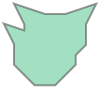

In [19]:
a = get_cat(0, 0)
b = get_cat(0.5, 0.965)
get_overlap_stats(a, b)
shapely.unary_union([a, b])

In [20]:
str(get_cat(0, 0))

'POLYGON ((0 0, 1 0, 2 1, 2 2, 2.5 3, 1 2.5, 0 2.5, -1.5 3, -1 2, -1 1, 0 0))'

The overlap IoU between the two rectangles is 0.50268
The single rectangle iou overlap is 0.66905 for r1
The single rectangle iou overlap is 0.66905 for r2


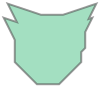

In [21]:
a = get_cat(0, 0)
b = get_cat(0.18, 0.635)
get_overlap_stats(a, b)
shapely.unary_union([a, b])

The overlap IoU between the two rectangles is 0.19178
The single rectangle iou overlap is 0.32184 for r1
The single rectangle iou overlap is 0.32184 for r2


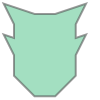

In [22]:
a = get_cat(0, 0)
b = get_cat(0, 1.5)
get_overlap_stats(a, b)
shapely.unary_union([a, b])

In [107]:
def z_transform(input_data):
    output_data = []
    ### BEGIN SOLUTION
    data_mean = input_data.mean()
    data_std = input_data.std()
    output_data = np.vstack([(sample - data_mean) / data_std for sample in input_data])
    ### END SOLUTION
    return np.vstack(output_data)


In [109]:
z_transform(np.array([[0, 0], [0, 0], [1, 1], [1, 1]]))

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])